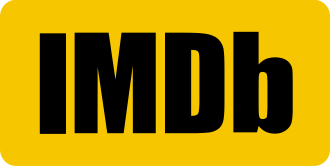

# Exploratory Data Analysis 

##### This is an IMDB data set which I have scraped from an IMDB website. 
##### Here, I have performed EDA (Exploratory Data Analysis) on this dataset.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Shrawani\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Importing Dataset

In [2]:
# Reading movies data from the csv
moviesdata = pd.read_csv(r"C:\Users\Shrawani\Downloads\moviesdata.csv")

#### Exploring Data

In [3]:
# viewing the first 5 records
moviesdata.head(5)

,Title,Release_Year,Duration(min),Genre,Ratings,Votes,Gross
0,Avengers: Endgame,2019,181,"Action, Adventure, Drama",8.4,"1,237,379",$858.37M
1,Avatar,2009,162,"Action, Adventure, Fantasy",7.9,"1,370,181",$760.51M
2,Titanic,1997,194,"Drama, Romance",7.9,"1,260,153",$659.33M
3,Star Wars: Episode VII - The Force Awakens,2015,138,"Action, Adventure, Sci-Fi",7.8,"964,029",$936.66M
4,Avengers: Infinity War,2018,149,"Action, Adventure, Sci-Fi",8.4,"1,176,335",$678.82M


In [4]:
# viewing the bottom 5 records
moviesdata.tail(5)

,Title,Release_Year,Duration(min),Genre,Ratings,Votes,Gross
45,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,"2,820,047",$534.86M
46,Harry Potter and the Sorcerer's Stone,2001,152,"Adventure, Family, Fantasy",7.6,"841,270",$317.58M
47,Despicable Me 2,2013,98,"Animation, Adventure, Comedy",7.3,"419,892",$368.06M
48,The Lion King,1994,88,"Animation, Adventure, Drama",8.5,"1,122,234",$422.78M
49,The Jungle Book,2016,106,"Animation, Action, Adventure",7.4,"289,142",$364.00M


In [5]:
# viewing random 5 records
moviesdata.sample(5)

,Title,Release_Year,Duration(min),Genre,Ratings,Votes,Gross
43,Zootopia,2016,108,"Animation, Adventure, Comedy",8.0,"535,246",$341.27M
37,Pirates of the Caribbean: On Stranger Tides,2011,137,"Action, Adventure, Fantasy",6.6,"555,865",$241.06M
35,Aladdin,2019,128,"Adventure, Comedy, Family",6.9,"285,628",$355.56M
34,Rogue One,2016,133,"Action, Adventure, Sci-Fi",7.8,"676,421",$532.18M
48,The Lion King,1994,88,"Animation, Adventure, Drama",8.5,"1,122,234",$422.78M


In [6]:
# viewing the data information
moviesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50 non-null     object 
 1   Release_Year   50 non-null     object 
 2   Duration(min)  50 non-null     int64  
 3   Genre          50 non-null     object 
 4   Ratings        50 non-null     float64
 5   Votes          50 non-null     object 
 6   Gross          50 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


- Here we have found out info of the dataset.
- Data set consist of 50 records(rows) and 7 fields(columns).
- There are no null values in our data.
- We need to change the data type of few columns  

- Some variables data type are object, instead they should be in integer format.
- We will change the data types for futher analysis

In [7]:
moviesdata['Release_Year'] = pd.to_numeric(moviesdata['Release_Year'])

ValueError: Unable to parse string "I 2013" at position 15

- We found out that Release_Year has a string "I".
- We will remove those I's and convert Release_Year to Integer.

In [8]:
# finding which release year is having 'I' string in it
moviesdata[moviesdata['Release_Year'].str.startswith('I')]

,Title,Release_Year,Duration(min),Genre,Ratings,Votes,Gross
15,Frozen,I 2013,102,"Animation, Adventure, Comedy",7.4,"655,399",$400.74M
16,Beauty and the Beast,I 2017,129,"Adventure, Family, Fantasy",7.1,"329,610",$504.01M
31,Joker,I 2019,122,"Crime, Drama, Thriller",8.4,"1,437,847",$335.45M
42,Alice in Wonderland,I 2010,108,"Adventure, Family, Fantasy",6.4,"435,546",$334.19M


In [9]:
# Relpacing the 'I' and again cheching if they are replaced or not
moviesdata['Release_Year'] = moviesdata['Release_Year'].str.replace('I','')
moviesdata[moviesdata['Release_Year'].str.startswith('I')]

,Title,Release_Year,Duration(min),Genre,Ratings,Votes,Gross


In [10]:
# Now since we have replaced it, we can convert it to numeric or datatime datatype but, here we will convert it to numeric 
moviesdata['Release_Year'] = pd.to_numeric(moviesdata['Release_Year'])

In [11]:
# After viewing this data 'I' stands for the roman numeral 1
# We will add that 1 'I' to the title
moviesdata.iloc[[15,16,31,42],0]  = moviesdata.iloc[[15,16,31,42],0] + ' I'

In [12]:
# Here we are converting votes to numeric, we will replace ','.
moviesdata['Votes'] = moviesdata['Votes'].str.replace(",", "")
moviesdata['Votes'] = pd.to_numeric(moviesdata['Votes'])

In [13]:
# Removing $ and M from gross and converting it into integer
moviesdata['Gross'] = pd.to_numeric(moviesdata['Gross'].str.replace('$', '').str.replace('M', '')) * 1000000

C:\Users\Shrawani\AppData\Local\Temp\ipykernel_33940\4003249156.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  moviesdata['Gross'] = pd.to_numeric(moviesdata['Gross'].str.replace('$', '').str.replace('M', '')) * 1000000


In [14]:
# Checking the info as we have changed the data types
moviesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50 non-null     object 
 1   Release_Year   50 non-null     int64  
 2   Duration(min)  50 non-null     int64  
 3   Genre          50 non-null     object 
 4   Ratings        50 non-null     float64
 5   Votes          50 non-null     int64  
 6   Gross          50 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.9+ KB


- Title, Genre and Release_Year are categorical variables.
- Duration(min), Ratings, Votes and Gross are numerical variables 
- Duration(min) - continuous variable
- Ratings - continuous variabl

In [15]:
# checking any sample data
moviesdata.sample(3)

,Title,Release_Year,Duration(min),Genre,Ratings,Votes,Gross
11,Black Panther,2018,134,"Action, Adventure, Sci-Fi",7.3,825269,700060000.0
41,Star Wars: Episode I - The Phantom Menace,1999,136,"Action, Adventure, Fantasy",6.5,844643,474540000.0
2,Titanic,1997,194,"Drama, Romance",7.9,1260153,659330000.0


In [16]:
# Here we decribed our data 
moviesdata.describe()

,Release_Year,Duration(min),Ratings,Votes,Gross
count,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01
mean,2012.960000,133.080000,7.386000,7.617167e+05,4.551956e+08
std,6.639277,25.768863,0.780897,5.138575e+05,1.550588e+08
min,1993.000000,88.000000,5.600000,1.492800e+05,2.260100e+08
25%,2011.000000,118.000000,6.800000,3.561222e+05,3.525450e+08
50%,2015.000000,133.500000,7.400000,6.673420e+05,4.163600e+08
75%,2018.000000,148.500000,7.900000,9.261555e+05,5.279350e+08
max,2019.000000,201.000000,9.000000,2.820047e+06,9.366600e+08


- Describe gives count, min, max and std for every numeric variable 
- Since we have 50 records and no null values, the count for every variable is 50
- Average Ratings i.e mean calculated is 7.386
- Similarly for votes Votes and Gross
- This summary of data can be helpfull for statistical analysis

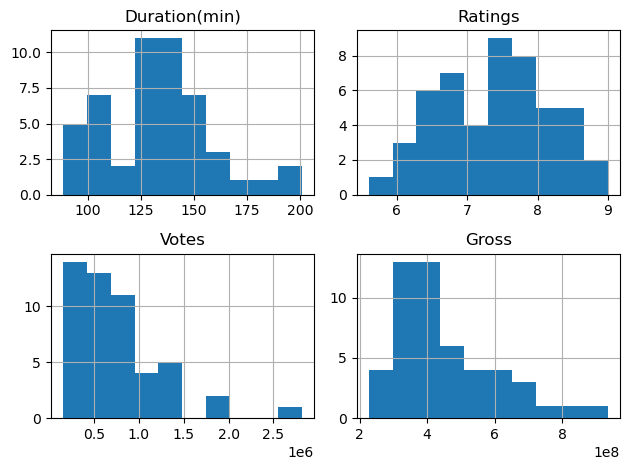

In [17]:
# Viewing the distribution of data using bar plot
cols = ['Duration(min)','Ratings','Votes','Gross']
moviesdata[cols].hist()
plt.tight_layout()
plt.show()

- Duration(min) is right skewed
- Ratings, the data is normally distributed, it shows normal distribution
- Votes, we can see the data is heavily right skewed, noting mean is less 
- Gross, the data is heavily right skewed, mean is less than median and the mode is greater than both mean and median

In [18]:
# Finding correlation
moviesdata.corr()

,Release_Year,Duration(min),Ratings,Votes,Gross
Release_Year,1.000000,-0.225788,-0.325250,-0.429486,0.075108
Duration(min),-0.225788,1.000000,0.258774,0.534360,0.261070
Ratings,-0.325250,0.258774,1.000000,0.760406,0.320206
Votes,-0.429486,0.534360,0.760406,1.000000,0.323147
Gross,0.075108,0.261070,0.320206,0.323147,1.000000


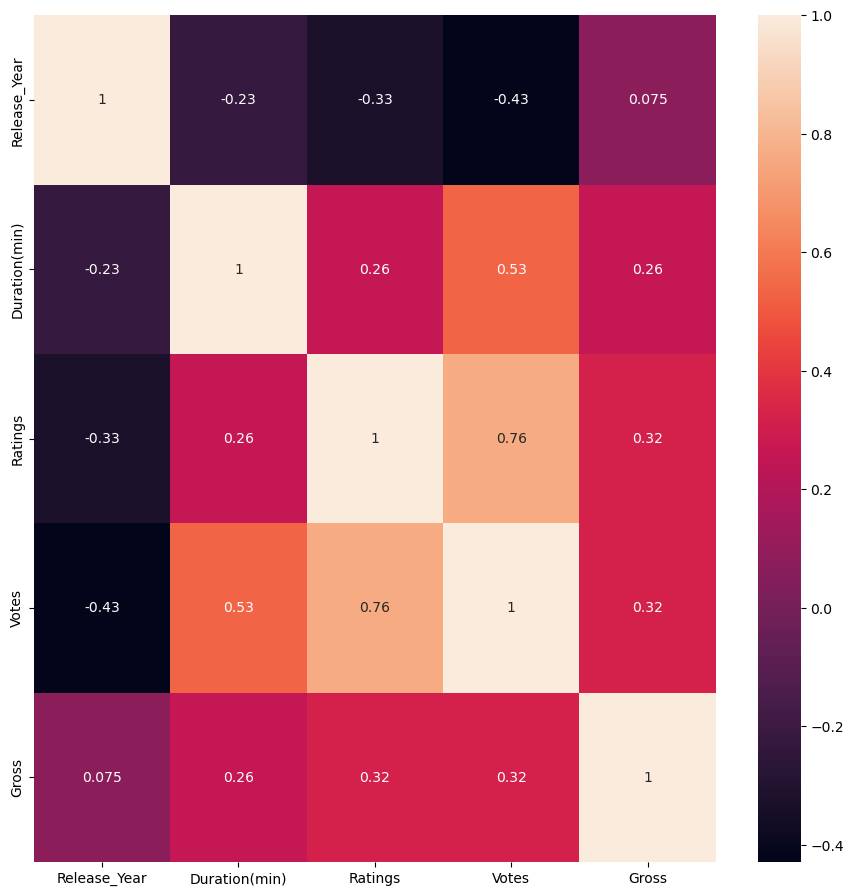

In [19]:
#Finding the correlation using heatmap
corr = moviesdata.corr()
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(corr, annot=True)
plt.show()

In the above plot, light pink represents maximum correlation and the other pink or violet colour represents minimum correlation. We can see there is no correlation.

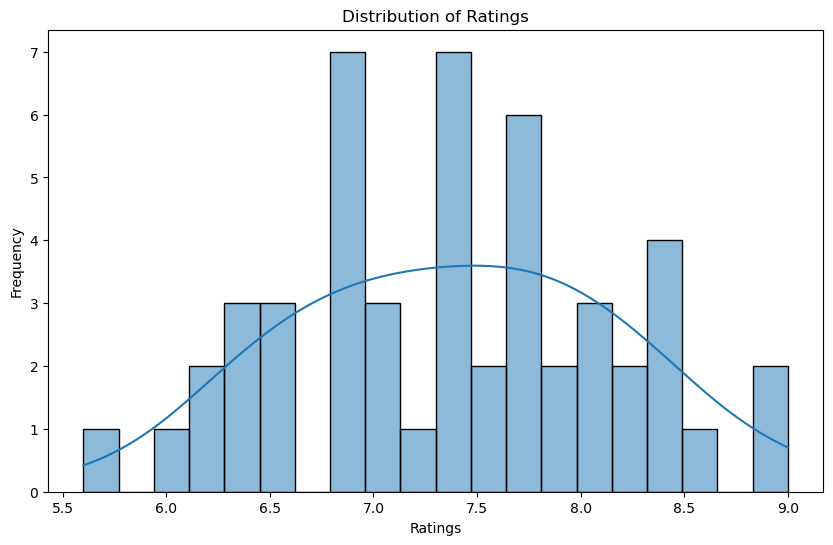

In [20]:
# distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(moviesdata['Ratings'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

The graph shows ratings frequency distribution, the data is normaly distributed as observed in the above graph, mean, median and mode are at the center.

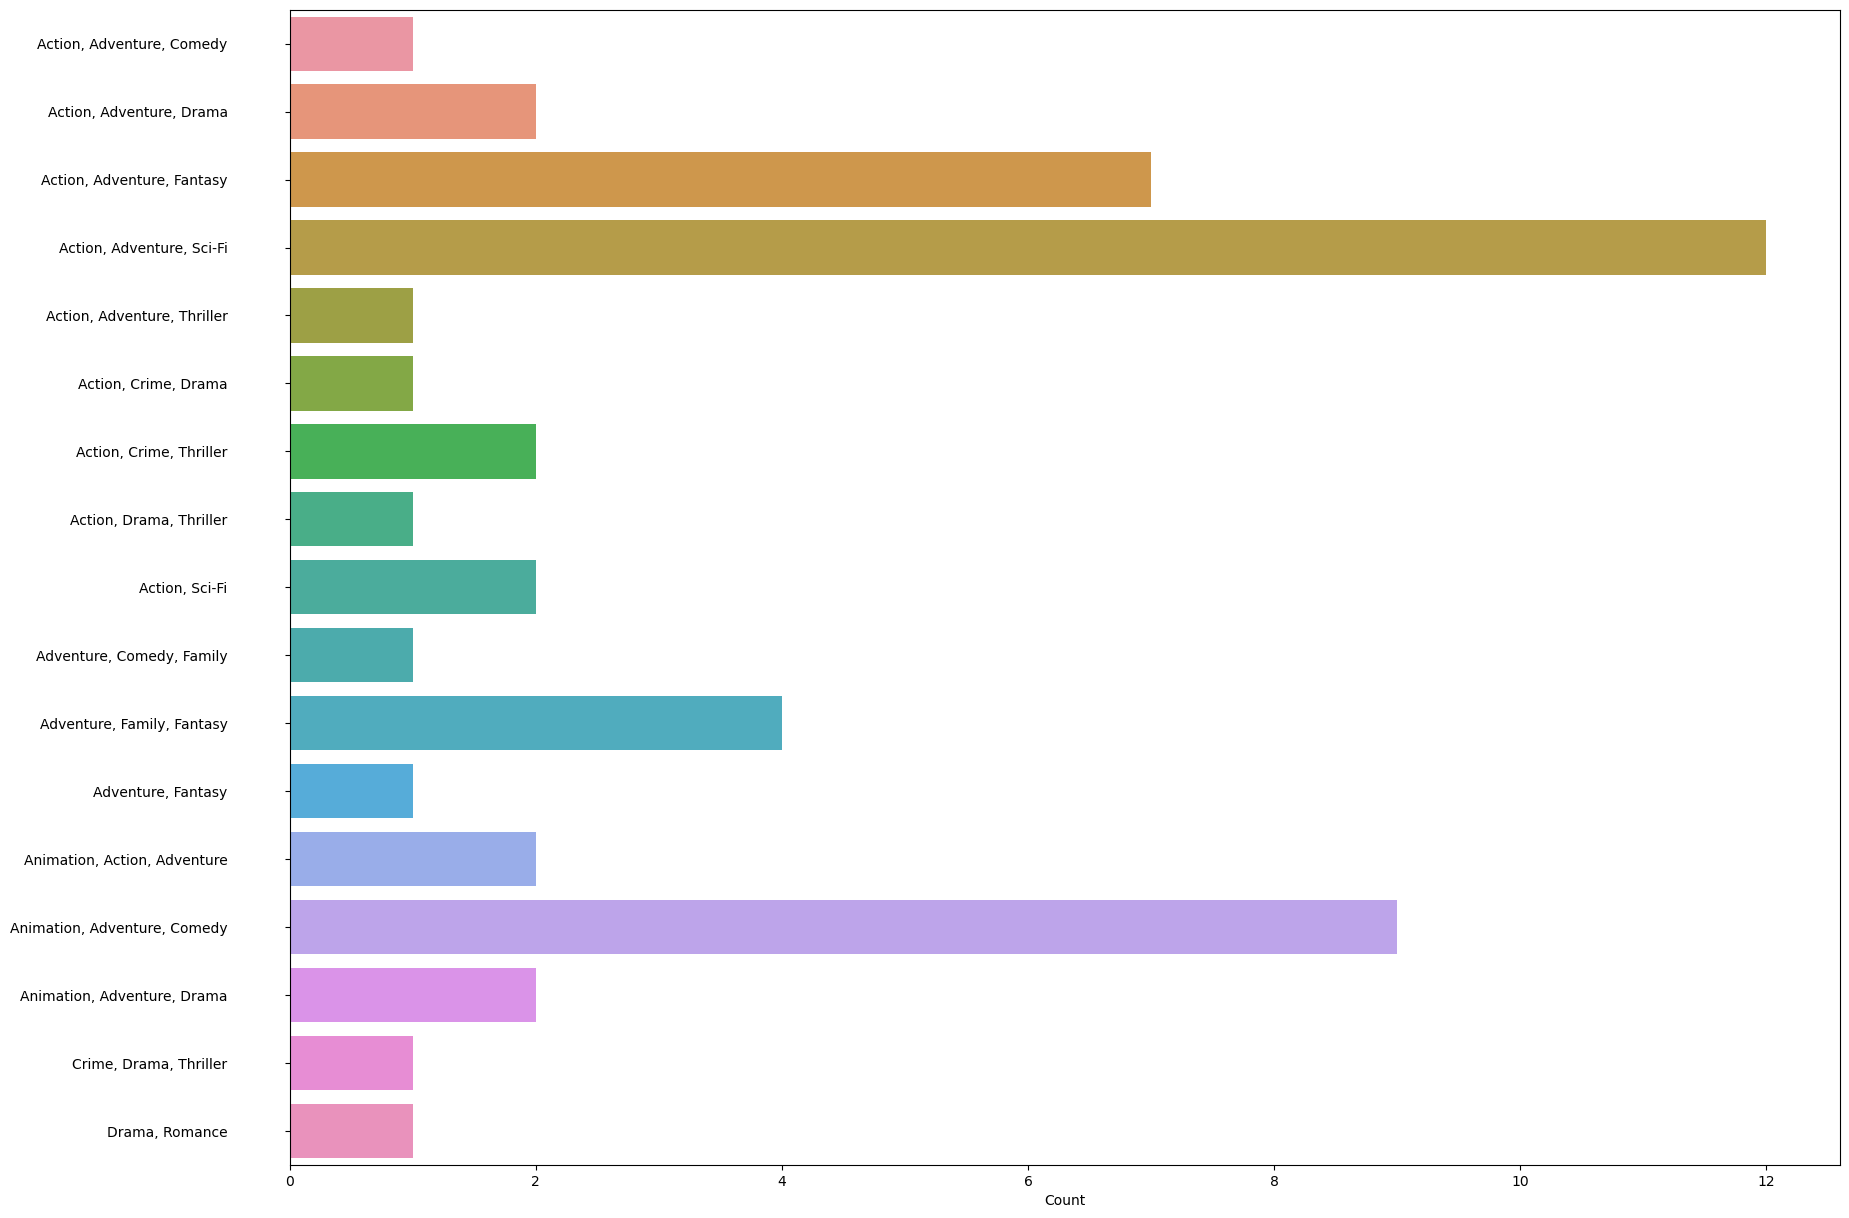

In [21]:
# drawing the bar plot for the genre column
# grouping the dataframe by "genre" column and then counting each category and displaying largest count
y = moviesdata.groupby("Genre")['Genre'].count()
x = y.index #the index(row labels) of the dataframe
 
plt.figure(figsize=(20,15)) # setting the plot figure size
ax = sns.barplot(x= y, y = x) # using the seaborn's barplot method
ax.set(xlabel = 'Count') 
ax.set(ylabel = '') 

plt.show() # displaying the plo

In this plot, the most watched genre is Action, Adventure, Sci-Fy and the second is Animation, Avdenture, Drama

In [22]:
#What are the top 10 most popular titles based on ratings and votes?
moviesdata['Popularity'] = moviesdata['Ratings'] * moviesdata['Votes']
moviesdata_sorted = moviesdata.sort_values(by='Popularity', ascending=False)
top_10_popular_titles = moviesdata_sorted.head(10)['Title']
print("Top 10 most popular titles based on ratings and votes:")
print(top_10_popular_titles)

Top 10 most popular titles based on ratings and votes:
45                                  The Dark Knight
26    The Lord of the Rings: The Return of the King
29                            The Dark Knight Rises
31                                          Joker I
7                                      The Avengers
1                                            Avatar
0                                 Avengers: Endgame
2                                           Titanic
4                            Avengers: Infinity War
48                                    The Lion King
Name: Title, dtype: object


This shows the top 10 most popular titles based on ratings and votes, The Dark Knight is the highest in ratings and votes.

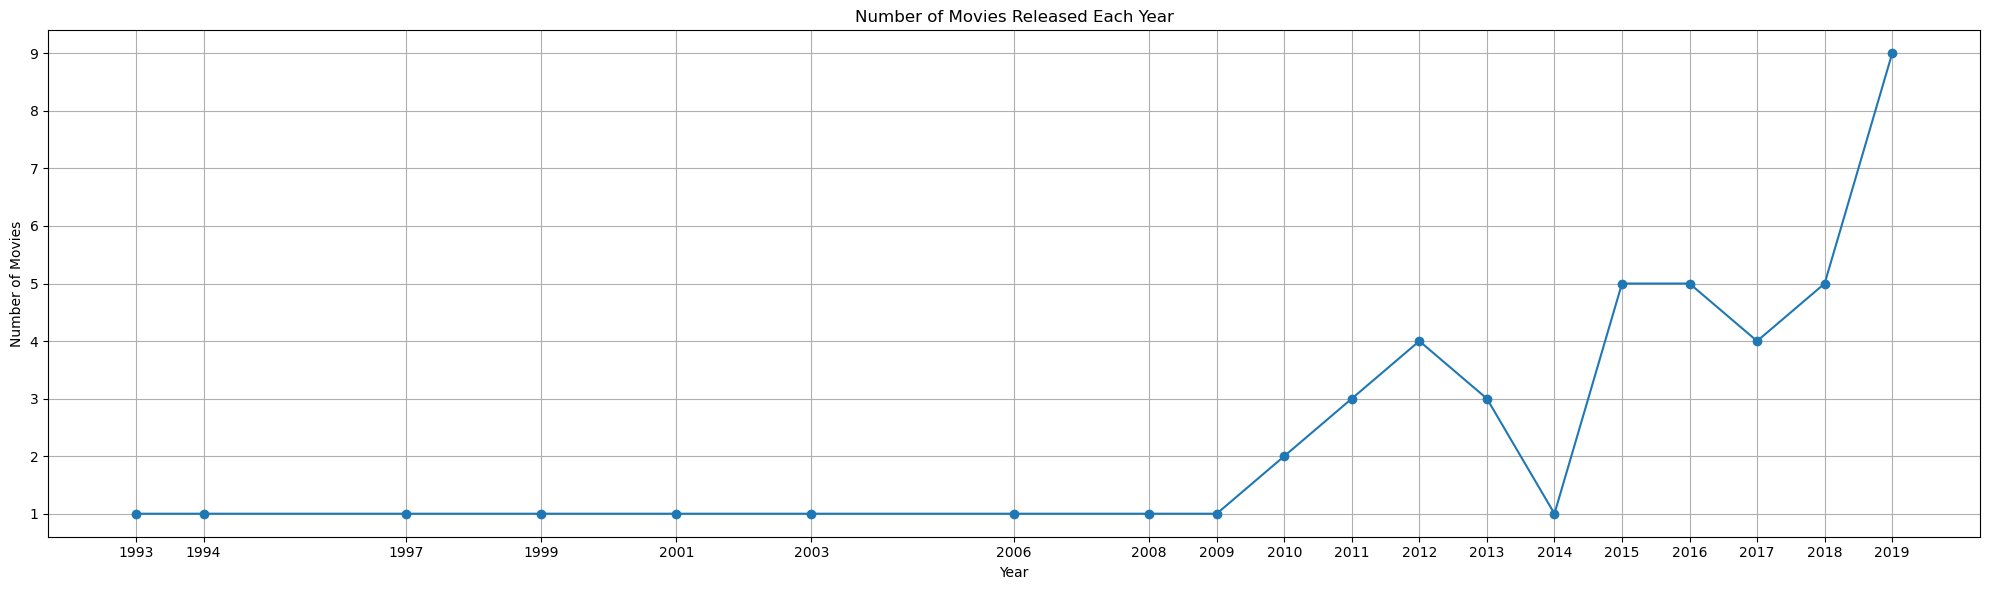

In [23]:
#Are there any trends or patterns in movie releases based on release years?
# Count the number of movies released each year
movie_counts = moviesdata['Release_Year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(20, 6))
plt.plot(movie_counts.index, movie_counts.values, marker='o')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.xticks(movie_counts.index)
plt.tight_layout()
plt.show()

- We can see here according to the data scraped from the site, in the intial years less movies were released, in 2019 the number increases.

How do movies from popular franchises (e.g., Avengers, Star Wars) compare in terms of ratings, votes, and gross revenue?

In [24]:
# Searching for the movies containing Avengers and Star Wars
avengers_movies = moviesdata[moviesdata['Title'].str.contains('Avengers')]
star_wars_movies = moviesdata[moviesdata['Title'].str.contains('Star Wars')]

# viewing avengers movies 
print(avengers_movies) 

                      Title  Release_Year  Duration(min)  \
0         Avengers: Endgame          2019            181   
4    Avengers: Infinity War          2018            149   
7              The Avengers          2012            143   
10  Avengers: Age of Ultron          2015            141   

                                    Genre  Ratings    Votes        Gross  \
0    Action, Adventure, Drama                  8.4  1237379  858370000.0   
4   Action, Adventure, Sci-Fi                  8.4  1176335  678820000.0   
7              Action, Sci-Fi                  8.0  1444806  623280000.0   
10  Action, Adventure, Sci-Fi                  7.3   909498  459010000.0   

    Popularity  
0   10393983.6  
4    9881214.0  
7   11558448.0  
10   6639335.4  


In [25]:
# viewing star war movies
print(star_wars_movies)

                                            Title  Release_Year  \
3      Star Wars: Episode VII - The Force Awakens          2015   
13        Star Wars: Episode VIII - The Last Jedi          2017   
36  Star Wars: Episode IX - The Rise of Skywalker          2019   
41      Star Wars: Episode I - The Phantom Menace          1999   

    Duration(min)                                   Genre  Ratings   Votes  \
3             138   Action, Adventure, Sci-Fi                  7.8  964029   
13            152  Action, Adventure, Fantasy                  6.9  663136   
36            141  Action, Adventure, Fantasy                  6.4  483794   
41            136  Action, Adventure, Fantasy                  6.5  844643   

          Gross  Popularity  
3   936660000.0   7519426.2  
13  620180000.0   4575638.4  
36  515200000.0   3096281.6  
41  474540000.0   5490179.5  


In [26]:
# Calculate average ratings, votes, and gross revenue for each franchise
avengers_avg_ratings = avengers_movies['Ratings'].mean()
avengers_avg_votes = avengers_movies['Votes'].mean()
avengers_total_gross = avengers_movies['Gross'].sum()

star_wars_avg_ratings = star_wars_movies['Ratings'].mean()
star_wars_avg_votes = star_wars_movies['Votes'].mean()
star_wars_total_gross = star_wars_movies['Gross'].sum()

In [27]:
# Create a DataFrame to store the comparison results
franchise_comparison = pd.DataFrame({
    'Franchise': ['Avengers', 'Star Wars'],
    'Average Ratings': [avengers_avg_ratings, star_wars_avg_ratings],
    'Average Votes': [avengers_avg_votes, star_wars_avg_votes],
    'Total Gross Revenue': [avengers_total_gross, star_wars_total_gross]
})

In [28]:
franchise_comparison

,Franchise,Average Ratings,Average Votes,Total Gross Revenue
0,Avengers,8.025,1192004.5,2.619480e+09
1,Star Wars,6.900,738900.5,2.546580e+09


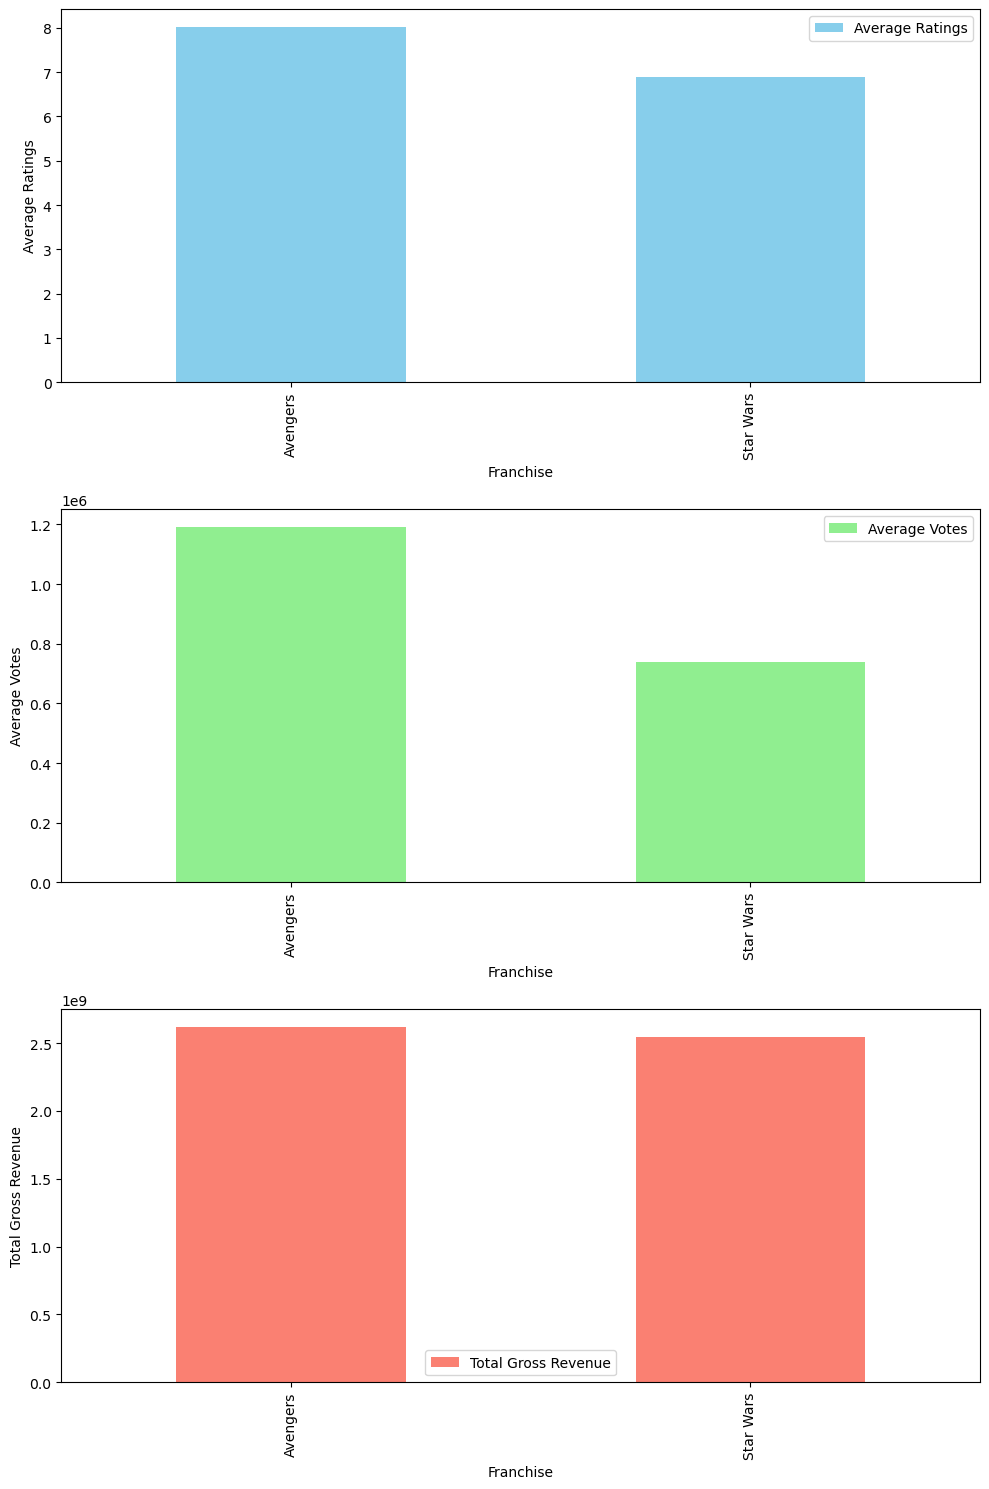

In [29]:
# Plot the comparison results
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

franchise_comparison.plot(kind='bar', x='Franchise', y='Average Ratings', ax=axes[0], color='skyblue')
axes[0].set_ylabel('Average Ratings')

franchise_comparison.plot(kind='bar', x='Franchise', y='Average Votes', ax=axes[1], color='lightgreen')
axes[1].set_ylabel('Average Votes')

franchise_comparison.plot(kind='bar', x='Franchise', y='Total Gross Revenue', ax=axes[2], color='salmon')
axes[2].set_ylabel('Total Gross Revenue')

plt.tight_layout()
plt.show()

- We can see that both the franchise are popular
- In this plot we can see Avengers movies has the highest ratings, votes and gross revenue earned as compared to Star Wars
- Star Wars movies average vote is less, average rating is bit higher
- Total gross for both franchise is relatively close
- This suggest that both the franchises have been financially successful
- The difference in average rating and votes can be due to various factors marketing strategies, target audience or culture impact. Despite these difference both the franchise have managed to generate significant revenue
- Overall the output provides valuable insights interms of performance and popularity.

##### Which movies achieved both critical acclaim (high ratings) and commercial success (high box office gross)?

In [30]:
# Define thresholds for high ratings and high box office gross
high_ratings_threshold = 8.0  
high_gross_threshold = 500_000_000 

In [31]:
# Filter the DataFrame to find movies with both high ratings and high box office gross
highly_acclaimed_movies = moviesdata[(moviesdata['Ratings'] >= high_ratings_threshold) & 
                                    (moviesdata['Gross'] >= high_gross_threshold)]

In [32]:
# Display the movies that meet the criteria
print("Movies with high ratings and high box office gross:")
print(highly_acclaimed_movies[['Title', 'Ratings', 'Gross']])

Movies with high ratings and high box office gross:
                     Title  Ratings        Gross
0        Avengers: Endgame      8.4  858370000.0
4   Avengers: Infinity War      8.4  678820000.0
7             The Avengers      8.0  623280000.0
45         The Dark Knight      9.0  534860000.0


- Avnegers Endgame and Avengers Infinity War has highest rating 8.4 and significant box office gross 858370000 and 678820000. These movies are part of Marvels and are known for massive scale, cast and epic story telling which have connected well with audiance